<a href="https://colab.research.google.com/github/Aleksandra0001/DataScience/blob/main/Hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вторая часть.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate, integrate

Пусть все население (N индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t); зараженные индивиды (infected) — I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t).\
**`Примем, что`** \

> **S(t)+I(t)+R(t)=N** \

**Числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов:**

> **dt/dS = −αS**

**Cкорость изменения инфицированных индивидов:** \

> **dt/dI = αS−βI**

**Скорость изменения числа выздоравливающих индивидов:** \

> **dt/dR = βI**

Постоянные пропорциональности **α** и **β** называют коэффициентами заболеваемости и выздоровления соответственно. \

**`Примем, что:`**

1. α = 0.5
2. β = 0.3
3. N = 1 000 000
4. S(0) = 990 000
5. I(0) = 7 000
6. R(0) = 3 000
7. t_0, t_f = 0, 25


In [64]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

t=np.linspace(0,25,100)

1. Решить дифференциальное уравнение (2) и построить график функции S(t)

In [59]:
# dt/dS = −αS
def dsdt(t, S):
    return -alpha * S 

solution1 = integrate.solve_ivp(dsdt, (t0, tf), [S], dense_output=True)
solution1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7feb2e2634f0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

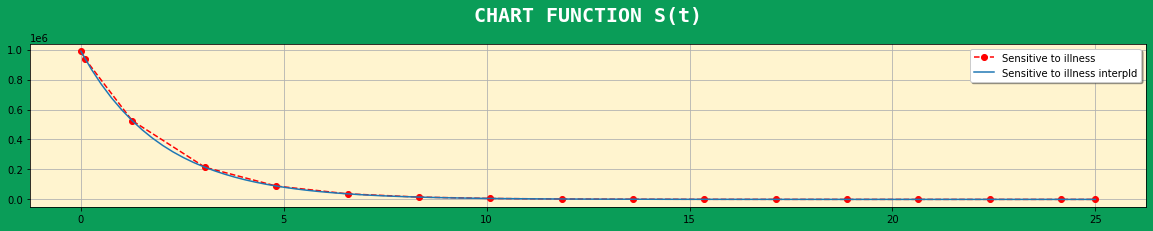

In [67]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0a9d58')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')

ax.set_title('CHART FUNCTION S(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)
ax.grid()

t1, y1 = solution1.t, solution1.y[0]
plt.plot(t1, y1, 'o', color='red', label='Sensitive to illness', linestyle='--')

f1=interpolate.interp1d(t1, y1, kind='cubic')
plt.plot(t, f1(t), label='Sensitive to illness interpId')

plt.legend(shadow=True)
plt.show()

2. Решить дифференциальное уравнение (3) и построить график функции I(t)

In [82]:
# dt/dI = αS−βI
def didt(t, I):
    return f1(t) - beta*I
solution2 = integrate.solve_ivp(didt, (t0, tf), [I], dense_output=True)
solution2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7feb22093280>
   status: 0
  success: True
        t: array([0.00000000e+00, 7.08573742e-03, 7.79431117e-02, 7.86516854e-01,
       2.49851771e+00, 4.52670077e+00, 7.06372333e+00, 1.05793556e+01,
       1.36648599e+01, 1.67503642e+01, 1.97621888e+01, 2.27321431e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13980.17020846,  81634.52296161,
        574508.84705237, 922702.91988248, 759697.97118819,
        450646.85933901, 182571.45701919,  76950.20791105,
         31488.56811427,  12974.03272095,   5372.07705163,
          2731.47105191]])
 y_events: None

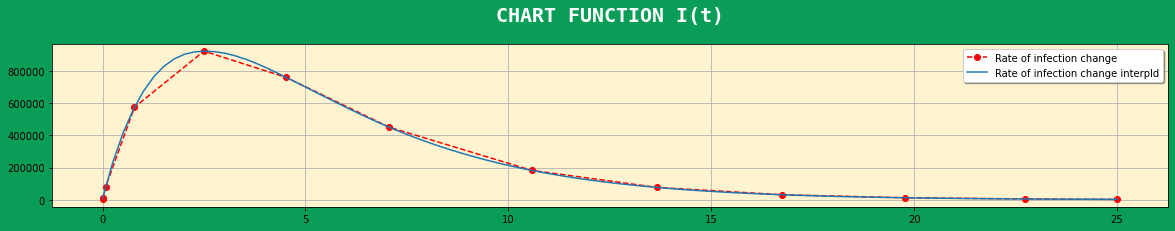

In [71]:
fig2 = plt.figure(figsize=(5,3))
ax = fig2.add_subplot(111)

fig2.set(facecolor = '#0a9d58')
fig2.set_figwidth(20)
ax.set(facecolor = '#fff4cf')

ax.set_title('CHART FUNCTION I(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)
ax.grid()

t2, y2 = solution2.t, solution2.y[0]
plt.plot(t2, y2, 'o', color='red', label='Rate of infection change', linestyle='--')

f2=interpolate.interp1d(t2, y2, kind='cubic')
plt.plot(t, f2(t), label='Rate of infection change interpId')

plt.legend(shadow=True)
plt.show()

3. Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interpid) и построить график функции R(t)

In [84]:
# S(t)+I(t)+R(t)=N
# dt/dR = βI
R=N-f1(t)-f2(t)
R

array([   3000.        , -104976.59038896, -183395.80647797,
       -237558.91585733, -272345.3814715 , -290271.16250606,
       -293151.77412041, -283326.13308473, -263265.70812241,
       -235441.96796363, -202325.93942717, -165886.76538962,
       -126627.67854956,  -84833.68107745,  -41065.10016049,
          4019.70558137,   49762.25816305,   95504.07959945,
        140586.74327366,  184507.0978135 ,  227240.20443547,
        268764.51490205,  309028.84015395,  347981.98270635,
        385572.74507448,  421749.92977352,  456462.33931868,
        489648.38807055,  521200.80717197,  551036.23188918,
        579205.5301484 ,  605790.45514174,  630872.76006134,
        654534.1980972 ,  676852.03817243,  697886.02856344,
        717691.63908445,  736324.33954969,  753839.59977341,
        770292.88956982,  785739.67855134,  800233.23288543,
        813819.16573515,  826541.09192189,  838441.63851689,
        849563.25315237,  859948.38346055,  869639.4765736 ,
        878677.99285024,

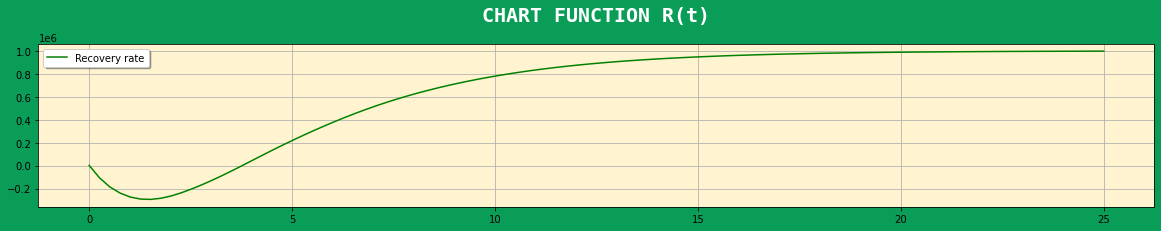

In [94]:
fig3 = plt.figure(figsize=(5,3))
ax = fig3.add_subplot(111)

fig3.set(facecolor = '#0a9d58')
fig3.set_figwidth(20)
ax.set(facecolor = '#fff4cf')

ax.set_title('CHART FUNCTION R(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)
ax.grid()

plt.plot(t, R, label='Recovery rate', linestyle='-', color='green' )

plt.legend(shadow=True)
plt.show()

4. Построить все три графика S(t), I(t) и R(t) на одной области отображения

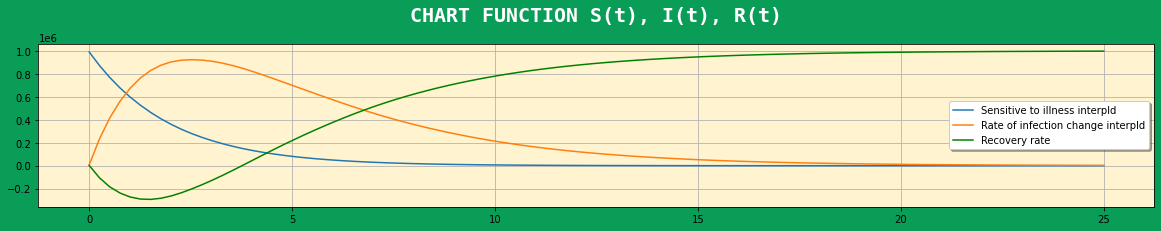

In [95]:
fig4 = plt.figure(figsize=(5,3))
ax = fig4.add_subplot(111)

fig4.set(facecolor = '#0a9d58')
fig4.set_figwidth(20)
ax.set(facecolor = '#fff4cf')

ax.set_title('CHART FUNCTION S(t), I(t), R(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

plt.plot(t, f1(t), label='Sensitive to illness interpId')

plt.plot(t, f2(t), label='Rate of infection change interpId')

plt.plot(t, R, label='Recovery rate', linestyle='-', color='green' )

plt.legend(shadow=True)
ax.grid()
plt.show()